# Importing libraires and creating model class

In [1]:
from pysolve3.model import Model
from pysolve3.utils import SFCTable, AddGrowth, ShockModel, SolveSFC
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Base Scenario 1

In [2]:
def create_model():
    model = Model()

    # Accounting
    model.set_var_default(0)
    
    ##################################################################
    # Variables
    ##################################################################
    
    model.var('Bankbalance', desc='Bankbalance of Firms', default=-41.792)
    model.var('Cr', desc='Consumption Rentiers')
    model.var('Cdw1', desc='Consumption desired Worker 1')
    model.var('Cdw2', desc='Consumption desired Worker 2')
    model.var('Cw1', desc='Consumption Worker 1')
    model.var('Cw2', desc='Consumption Worker 2', default=21.714)
    model.var('CA', desc='Current Account Balance')
    model.var('C', desc='Consumption', default=50.329)
    model.var('CGe', desc='Capital Gains on Equity')
    model.var('D', desc='Deposits')
    model.var('Df', desc='Deposits Firms', default=0)
    model.var('Dg', desc='Deposits Government', default=0)
    model.var('Dr', desc='Deposits Rentiers', default=22.55)
    model.var('Dw1', desc='Deposits Worker 1', default=23.14)
    model.var('Dw2', desc='Deposits Worker 2', default=114.248)
    model.var('Drow', desc='Deposits RoW')
    model.var('DA', desc='DDepreciation allowances', default=14.128)
    model.var('defGov', desc='Government Deficit', default=3)
    model.var('DpS', desc='Dividend per share')
    model.var('E_issued', desc='Equity issued in the current period')
    model.var('Ehr', desc='Equity held by Rentiers', default=100)
    model.var('Esf', desc='Equity supplied by Firms', default=100)
    model.var('Ex', desc='Exports', default=30.711)
    model.var('exFDf', desc='external Finance Demand Firms')
    model.var('G', desc='Government Expenditures', default=24.597)
    model.var('grG', desc='growth rate government expenditure', default=0.35)
    model.var('grK', desc='Accumulation', default=0.35)
    model.var('grY', desc='GDP growth rate', default=0.35)
    model.var('If', desc='Gross Investment', default=24.363)
    model.var('Im', desc='Imports')
    model.var('Inet', desc='Net investment')
    model.var('INTnetf', desc='net interest payments firms')
    model.var('K', desc='Capital Stock', default=292.44)
    model.var('L', desc='Loans')
    model.var('Lf', desc='Loans Firms', default=41.792)
    model.var('Lg', desc='Loans Government', default=88.714)
    model.var('Lrow', desc='Loans Rest of World', default=29.432)
    model.var('Lw1', desc='Loans Worker 1', default=0)
    model.var('Lw2', desc='Loans Worker 2', default=0)
    #model.var('Mcapf', desc='Market capitalisation firms')
    model.var('N', desc='Employment')
    model.var('Nw1', desc='Worker 1')
    model.var('Nw2', desc='Worker 2')
    model.var('Pe', desc='Equity prices', default=0.86)
    model.var('Pf', desc='Profits after taxes, depreciation and interest payments')
    model.var('PDf', desc='Profits distributed by Firms', default=12.989)
    model.var('PUf', desc='Retained profits', default=8.659)
    model.var('Pgf', desc='Gross Profits Firms')
    model.var('rL', desc='loan interest rate')
    model.var('rD', desc='deposits interest rate')
    model.var('T', desc='Taxes')
    model.var('Tf', desc='Taxes Firms')
    model.var('TR', desc='Taxes Rentier')
    model.var('Tw1', desc='Taxes Worker 1')
    model.var('Tw2', desc='Taxes Worker 2')
    model.var('u', desc='Capacity Utilization Ratio',default=0.684)
    model.var('VeR', desc='net wealth rentiers expected')
    model.var('Vf', desc='net wealth firms', default=164.662)
    model.var('Vgov', desc='net wealth government', default=-88.714)
    model.var('Vr', desc='net wealth rentiers', default=108.537)
    model.var('VRoW', desc='net wealth RoW', default=-29.432)
    model.var('Vw1', desc='net wealth Worker 1', default=23.14)
    model.var('Vw2', desc='net wealth Worker 2', default=114.248)
    model.var('Ww1', desc='Wage rate worker 1')
    model.var('Ww2', desc='Wage rate worker 2')
    model.var('wa', desc='Wage average')
    model.var('WB', desc='Wage Bill')
    model.var('WS', desc='Wage Share')
    model.var('Y', desc='GDP', default=100)
    model.var('YRoW', desc='Output Rest of the World')
    model.var('Ydr', desc='disposable income Rentiers', default=9.905)
    model.var('Ydw1', desc='disposable income Worker 1', default=20.418)
    model.var('Ydw2', desc='disposable income Worker 2', default=25.578)
    model.var('Yfc', desc='Full-Capacity Output')
    model.var('Ygr', desc='gross income rentiers')
    model.var('Ygw1', desc='gross income worker 1')
    model.var('Ygw2', desc='gross income worker 2')
    
    ##################################################################
    # Parametrs
    ##################################################################
    
    model.param('beta_1', desc='Animal Spirits', default=0)
    model.param('beta_2', desc='Sensitivity to capacity utilization', default=0.04)
    model.param('beta_3', desc='Sensitivity to profit share', default=0.005)
    model.param('beta_4', desc='Portion of paid loans', default=0.02)
    model.param('beta_5', desc='Sensitivity to retained Earnings', default=0.075)
    model.param('COR', desc='Capital-Output Ratio', default=2)
    model.param('defTGov', desc='Government Deficit to GDP Target', default=0.03)
    model.param('delta', desc='Depreciation rate', default=0.05)
    model.param('EFR', desc='Equity finance ratio', default=0.1)
    model.param('gRoW', desc='growth rate RoW and Exports', default=0.035)
    model.param('imit', desc='imitation parameter', default=0)
    model.param('nw1', desc='Worker 1 participation', default=0.5)
    model.param('P', desc='Price', default=1)
    model.param('pcydr', desc='propensity to consume out of income rentiers', default=0.5)
    model.param('pcydw1', desc='propensity to consume out of income worker 1', default=0.95)
    model.param('pcydw2', desc='propensity to consume out of income worker 2', default=0.7)
    model.param('pcvr', desc='propensity to consume out of wealth rentiers', default=0.04)
    model.param('pcvw1', desc='propensity to consume out of wealth rentiers', default=0.04)
    model.param('pcvw2', desc='propensity to consume out of wealth rentiers', default=0.04)
    model.param('pIm', desc='propensity to import', default=0.3)
    model.param('pr', desc='labor productivity', default=1)
    model.param('PrudRat', desc='Prudential Ratio', default=1)
    model.param('PS', desc='Profit Share', default=0.4)
    model.param('R', desc='policy interst rate', default=0.01)
    model.param('RR', desc='retention ratio', default=0.4)
    model.param('t', desc='tax rate personal', default=0.25)
    model.param('tf', desc='tax rate corporate', default=0.15)
    model.param('theta_0', desc='parameter in portfolio decision', default=0.5)
    model.param('theta_1', desc='parameter in portfolio decision', default=2)
    model.param('theta_2', desc='parameter in portfolio decision', default=2)
    model.param('theta_3', desc='parameter in portfolio decision', default=0.005)
    model.param('wmw2', desc='wage multiple of worker 2 compared to average wage', default=1.1)
    
    
    ##################################################################
    # Equations
    ##################################################################
    
    model.add('Y = C + If + G + Ex - Im') # Eq1
    model.add('N = Y/pr') #Eq2
    model.add('Nw1 = N*nw1') #Eq3
    model.add('Nw2 = N*(1-nw1)') #Eq4
    
    #Distribution
    model.add('WS = 1 - PS') #Eq5
    model.add('WB = WS*Y') #Eq6
    model.add('wa = WB/N') #Eq7
    model.add('Ww2 = wa*wmw2') #Eq8
    model.add('Ww1 =  (WB - Nw2 * Ww2 ) / Nw1') #Eq9
    
    # Capital Stock
    model.add('d(K) = If(-1) - DA(-1)') #Eq10
    model.add('DA = delta*K(-1)') #Eq11
    model.add('Yfc = K/COR') #Eq12
    model.add('u = Y/Yfc') #Eq13
    model.add('If = Inet + DA') # Eq14
    model.add('Inet = grK*K(-1)') # Eq15
    model.add('grK = beta_1 + beta_2*u(-1) + beta_3*PS(-1) + beta_4*rL(-1) + beta_5*(PUf(-1) + DA(-1))/K(-1)')
    
    # Profit Distribution
    model.add('Pgf = PS*Y') # Eq 17
    model.add('INTnetf = rL(-1)*Lf(-1) - rD(-1)*Df(-1)') # Eq 18
    model.add('Tf = Max(tf*(Pgf - INTnetf - DA), 0)')
    model.add('Pf = Pgf - INTnetf - DA - Tf') # Eq 22
    model.add('PDf = Max(Pf*(1-RR),0)') # Eq 21
    model.add('DpS = PDf/Esf(-1)') # Eq 22 
    model.add('PUf = Pf - PDf') # Eq 23
    
    # Financing by firms
    model.add('exFDf = If - PUf - DA') #Eq 24
    model.add('E_issued = exFDf/Pe(-1)*EFR') #Eq 25
    model.add('Esf = Esf(-1) + E_issued') #Eq 26
    model.add('Bankbalance = Bankbalance(-1) - exFDf + E_issued*Pe') #Eq 27
    model.add('Df = Bankbalance*if_true(Bankbalance > 0)') #Eq 28
    model.add('Lf = -Bankbalance*if_true(Bankbalance < 0)') #Eq 29
    #model.add('') #Eq 30
    #model.add('') #Eq 31
    model.add('Vf = Vf(-1) + If(-1) - DA(-1) + d(Df) - d(Lf) - CGe - E_issued*Pe') #Eq 32
    
    # Household Worker 1
    model.add('Ygw1 = Ww1*Nw1 + Dw1(-1)*rD(-1)') # Eq 33
    model.add('Tw1 = Max(t*Ygw1, 0)') # Eq 34
    model.add('Ydw1 = Ygw1 - Tw1 - Lw1(-1)*rL(-1)') # Eq 35
    model.add('Cdw1 = (1-imit)*pcydw1*Ydw1(-1) + imit*Cw2 + pcvw1*Dw1') # Eq 36
    model.add('Cw1 = Cdw1') # Eq 37
    model.add('Vw1 = Vw1(-1) + Ydw1 - Cw1') # Eq 38
    model.add('Dw1 = Vw1*if_true(Vw1 > 0)') # Eq 39
    model.add('Lw1 = -Vw1*if_true(Vw1 < 0)') # Eq 40
    #model.add('') # Eq 41
    #model.add('') # Eq 42
    
    # Household Worker 2
    model.add('Ygw2 = Ww2*Nw2 + Dw2(-1)*rD(-1)') # Eq 47
    model.add('Tw2 = Max(t*Ygw2, 0)') # Eq 48
    model.add('Ydw2 = Ygw2 - Tw2 - Lw2(-1)*rL(-1)') # Eq 49
    model.add('Cdw2 = pcydw2*Ydw2(-1) + pcvw2*Vw2(-1)') # Eq 50
    model.add('Cw2 = Cdw2') 
    model.add('Vw2 = Vw2(-1) + Ydw2 - Cw2') # Eq 51
    model.add('Dw2 = Vw1*if_true(Vw1 > 0)') # Eq 52
    model.add('Lw2 = -Vw1*if_true(Vw1 < 0)') # Eq 53
    
    # Household Rentier
    model.add('Ygr = Dr(-1)*rD(-1) + Ehr(-1)*DpS') # Eq 56
    model.add('TR = Max(t*Ygr, 0)') # Eq 57
    model.add('Ydr = Ygr - TR') # Eq 58
    model.add('Cr = pcydr*Ydr(-1) + pcvr*Vr(-1)') # Eq 59
    model.add('Vr = Vr(-1) + Ydr - Cr + CGe') # Eq 60
    model.add('VeR = Vr(-1)*(1+grY(-1))') # Eq 61
    
    # Portfolio Decisions
    ## Tobin Equations (out)
    #model.add('Dr = (theta_0 + theta_1*rD - theta_2*DpS/Pe(-1) + theta_3*Ydr/Vr)*Vr') # Eq 62
    #model.add('Pe = ((1-theta_0 - theta_1*rD + theta_2*DpS/Pe(-1) - theta_3*Ydr/Vr))*Vr/Ehr') # Eq 63
    
    ## Model Equations
    model.add('Ehr = Esf') # Eq 64
    model.add('Pe = ((1-theta_0 -theta_1*rD + theta_2*DpS/Pe(-1))*VeR- theta_3*Ydr)/Ehr') # Eq 65
    model.add('Dr = Vr - Pe*Ehr') # Eq 66
    model.add('CGe = d(Pe)*Ehr(-1)') # Eq 67
    
    # Government
    model.add('G = G(-1)*(1+grG)') # Eq 68
    model.add('grG = grY(-1) + (defTGov - (defGov(-1)/Y(-1)))') # Eq 69
    model.add('T = Tw1 + Tw2 + TR + Tf') # Eq 70
    model.add('defGov = G - T + Lg(-1)*rL(-1) - Dg(-1)*rD(-1)') # Eq 71
    model.add('Vgov = Vgov(-1) - defGov') # Eq 72
    model.add('Dg = Vgov*if_true(Vgov > 0)') # Eq 73
    model.add('Lg = -Vgov*if_true(Vgov < 0)') # Eq 74
    #model.add('') # Eq 75
    #model.add('') # Eq 76
    
    # Banks
    model.add('rD = R') # Eq 77
    model.add('rL = R') # Eq 78
    model.add('L = Lf + Lw1 + Lw2 + Lg + Lrow') # Eq 79
    model.add('D = Df + Dw1 + Dw2 + Dr + Dg + Drow') # Eq 80
    
    # RoW
    model.add('YRoW = YRoW(-1)*(1+gRoW)') # Eq 81
    model.add('Im = pIm*Y') # Eq 82
    model.add('Ex = Ex(-1)*(1+gRoW)') # Eq 83
    model.add('CA = Ex - Im - rD*Drow(-1) + rL(-1)*Lrow(-1)') # Eq 84
    model.add('VRoW = VRoW(-1) - CA') # Eq 85
    model.add('Drow = VRoW*if_true(VRoW > 0)') # Eq 86
    model.add('Lrow = -VRoW*if_true(VRoW < 0)') # Eq 87
    
    model.add('C = Cr + Cw1 + Cw2')
    model.add('grY = d(Y)/Y(-1)')
    
    return model

In [3]:
Base = create_model()

In [4]:
dfBase = SolveSFC(Base)
dfBase.tail()

,Bankbalance,C,CA,CGe,COR,Cdw1,Cdw2,Cr,Cw1,Cw2,...,rL,t,tf,theta_0,theta_1,theta_2,theta_3,u,wa,wmw2
496,-7.591120e+08,1.242812e+09,6.184208e+07,7.112066e+07,2.0,4.885261e+08,5.259439e+08,2.283418e+08,4.885261e+08,5.259439e+08,...,0.01,0.25,0.15,0.5,2.0,2.0,0.005,0.701998,0.6,1.1
497,-7.856809e+08,1.286310e+09,6.400656e+07,7.360988e+07,2.0,5.056245e+08,5.443520e+08,2.363337e+08,5.056245e+08,5.443520e+08,...,0.01,0.25,0.15,0.5,2.0,2.0,0.005,0.701998,0.6,1.1
498,-8.131797e+08,1.331331e+09,6.624679e+07,7.618623e+07,2.0,5.233214e+08,5.634043e+08,2.446054e+08,5.233214e+08,5.634043e+08,...,0.01,0.25,0.15,0.5,2.0,2.0,0.005,0.701998,0.6,1.1
499,-8.416410e+08,1.377928e+09,6.856542e+07,7.885275e+07,2.0,5.416376e+08,5.831234e+08,2.531666e+08,5.416376e+08,5.831234e+08,...,0.01,0.25,0.15,0.5,2.0,2.0,0.005,0.701998,0.6,1.1
500,-8.710984e+08,1.426155e+09,7.096522e+07,8.161259e+07,2.0,5.605949e+08,6.035327e+08,2.620274e+08,5.605949e+08,6.035327e+08,...,0.01,0.25,0.15,0.5,2.0,2.0,0.005,0.701998,0.6,1.1


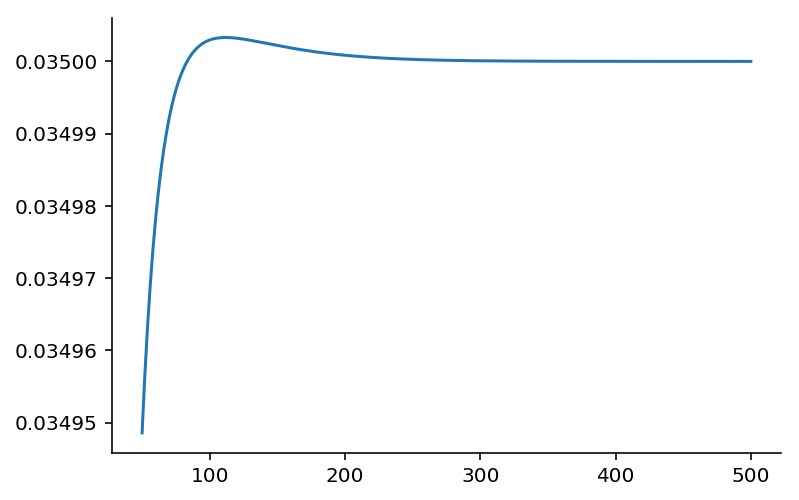

In [5]:
dfBase['grY'][50:].plot()
sns.despine()
plt.show()